# 1. The context
I just got some contract work with an Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Get the data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.
** 1. Read in the Ecommerce Customers csv file as a DataFrame called customers. 

In [9]:
# Reading the data 

customers = pd.read_csv('Ecommerce.csv')

In [10]:
# Check information

customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# 3. Data analysis

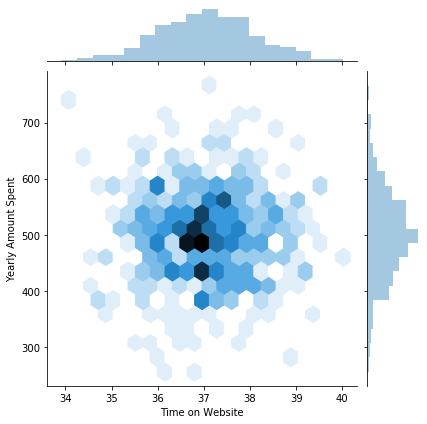

In [17]:
# What is the correlation between time spend on website and money spend?

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind='hex')

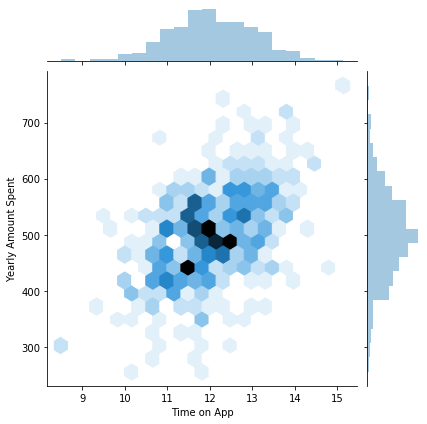

In [18]:
# What is the correlation between time spend on app and money spend?

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, kind='hex')

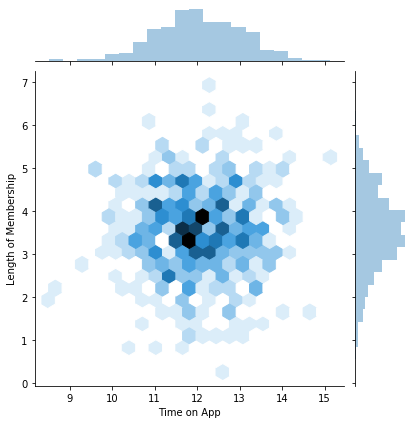

In [19]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)


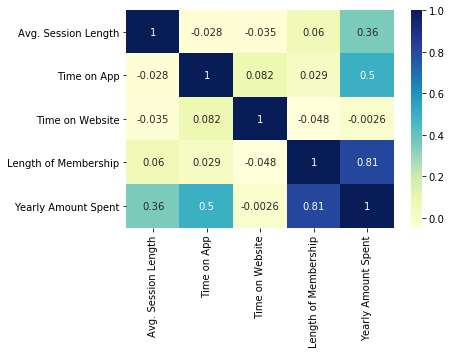

In [22]:
sns.heatmap(customers.corr(), annot=True, cmap="YlGnBu")

Based on the map, we can see clearly that Length of membership is the most correlated with Yearly amount spend.

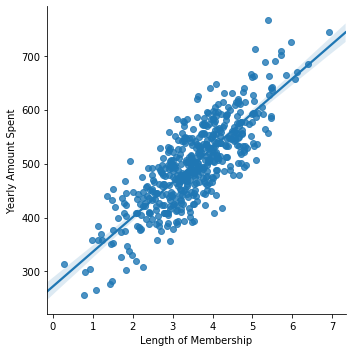

In [26]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

# 4. Traing and testing to predict upcoming data

In [34]:
# Define x and y

y = customers['Yearly Amount Spent']
x = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
# Train the data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [43]:
len(X_train)
len(y_train)

400

In [44]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Let's take a look at the coefficients of the models

print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.5962591  38.78534598  0.31038593 61.89682859]


In [47]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted')

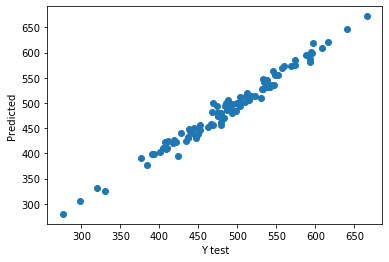

In [49]:
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted')

In [54]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.558441885315245
MSE: 109.86374118394055
RMSE: 10.481590584636502


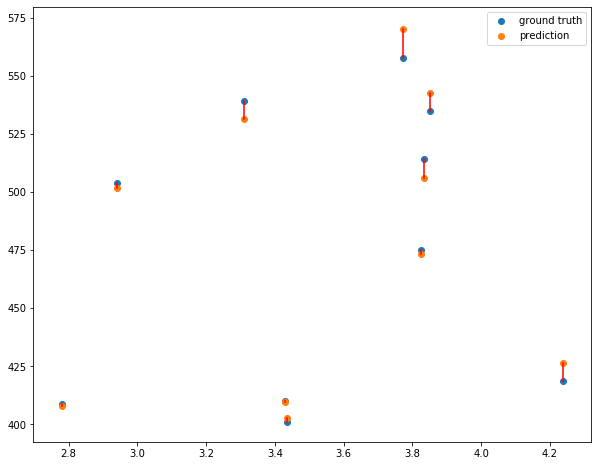

In [60]:
plt.figure(figsize=(10,8))
X_plot = X_test.head(10)
y_plot = y_test[:10]
predict_plot = predictions[:10]

plt.scatter(X_plot['Length of Membership'], y_plot, label='ground truth')
plt.scatter(X_plot['Length of Membership'], predict_plot, label='prediction')
plt.legend()

for i in range(10):
    x_val = X_plot['Length of Membership'].iloc[i]
    y_truth = y_plot.iloc[i]
    y_predict = predict_plot[i]
    plt.plot([x_val, x_val], [y_truth, y_predict], color='r')

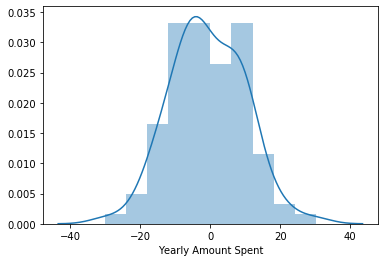

In [62]:
residuals = y_test - predictions
sns.distplot(residuals, bins=10)

In [68]:
df = pd.DataFrame(data=lm.coef_, index=x.columns, columns=['Coef'])

In [71]:
df_dict = {'Feature': x.columns, 'Coef': lm.coef_}
df = pd.DataFrame(data=df_dict)